## STUDENT PERFORMANCE PREDICTION

A multi-classification project that aims to predict a student performance(fair,good,excellent) from the feature variables provided in the dataset.

In [1]:
#Import Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 5)

### DATA UNDERSTANDING

In [2]:
#Load the dataset
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
#Check the shape of the dataset
df.shape

(1000, 16)

In [4]:
#Check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
#Check the statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,20.4980,2.308100,17.0,18.750,20.0,23.000,24.0
study_hours_per_day,1000.0,3.5501,1.468890,0.0,2.600,3.5,4.500,8.3
social_media_hours,1000.0,2.5055,1.172422,0.0,1.700,2.5,3.300,7.2
netflix_hours,1000.0,1.8197,1.075118,0.0,1.000,1.8,2.525,5.4
attendance_percentage,1000.0,84.1317,9.399246,56.0,78.000,84.4,91.025,100.0
sleep_hours,1000.0,6.4701,1.226377,3.2,5.600,6.5,7.300,10.0
exercise_frequency,1000.0,3.0420,2.025423,0.0,1.000,3.0,5.000,6.0
mental_health_rating,1000.0,5.4380,2.847501,1.0,3.000,5.0,8.000,10.0
exam_score,1000.0,69.6015,16.888564,18.4,58.475,70.5,81.325,100.0


In [6]:
#Drop unnecessary column
df.drop(columns=['student_id'], axis=1, inplace=True)

In [7]:
#Check for missing values
df.isna().sum().sort_values(ascending=False)

parental_education_level         91
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
#Check for duplicates
df.duplicated().sum()

0

### EXPLORATORY DATA ANALYSIS(EDA)

In [9]:
#Get numerical and categorical columns
num_col = df.select_dtypes(include=np.number).columns.to_list()
cat_col = df.select_dtypes(include='object').columns.to_list()

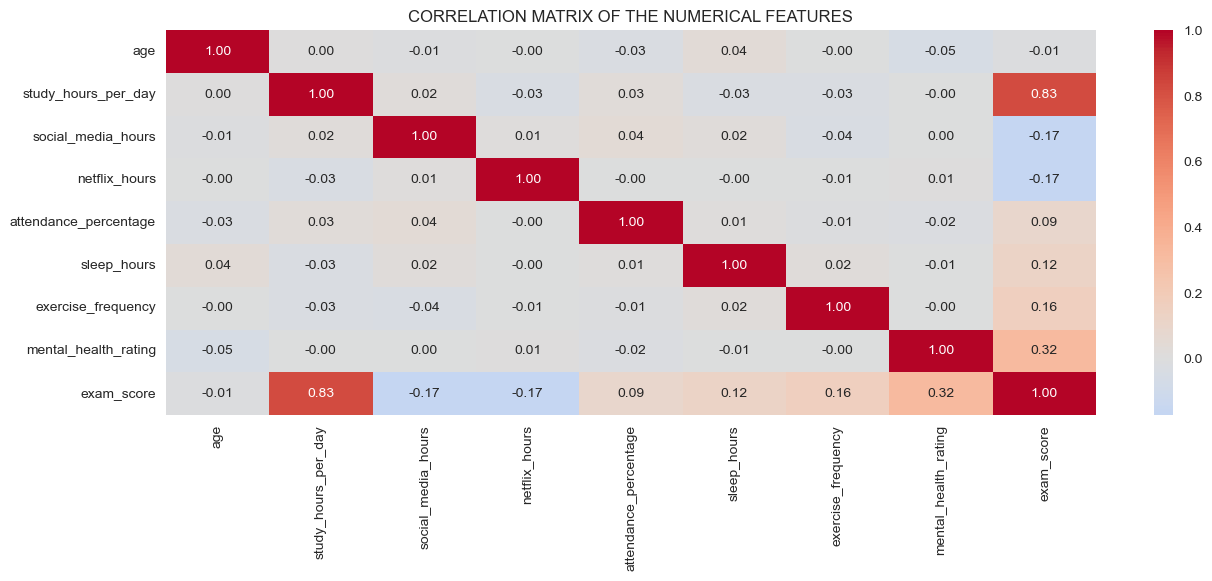

In [10]:
#Correlation of numerical features 
corr_matrix = df[num_col].corr()

#Visualize correlation with heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('CORRELATION MATRIX OF THE NUMERICAL FEATURES')
plt.show()

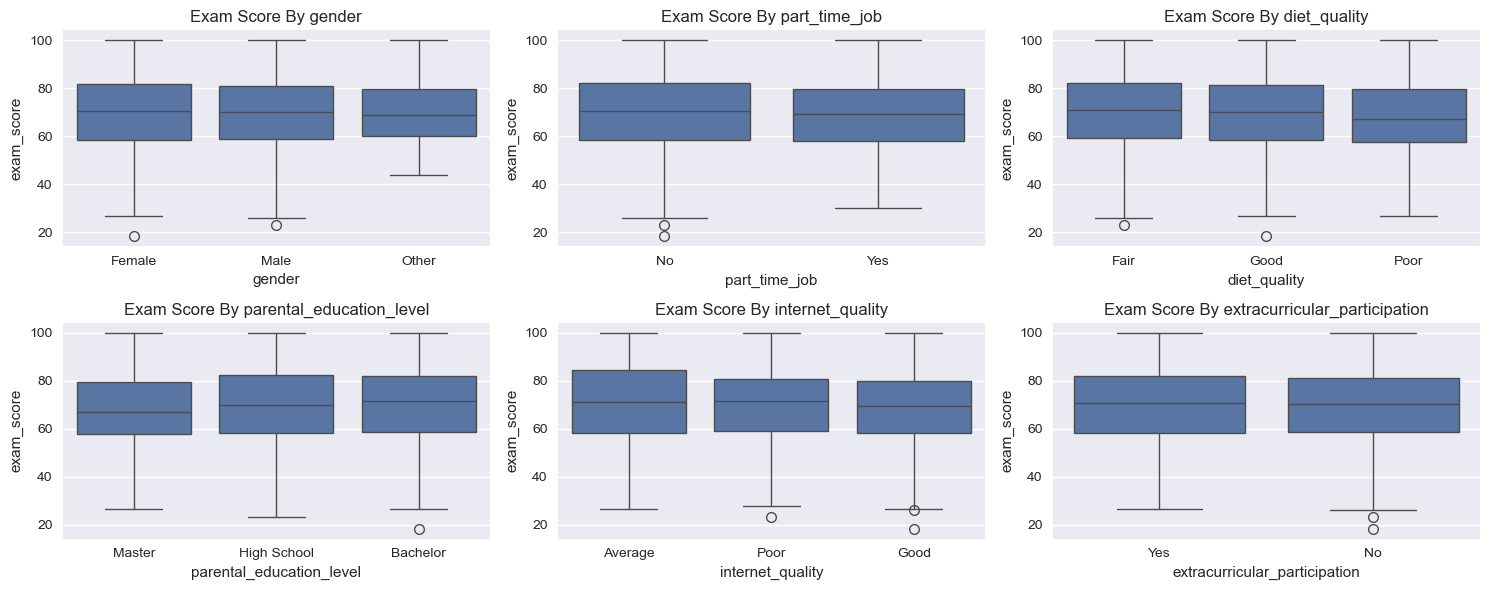

In [11]:
#Visualisation of categorical features
fig, axes = plt.subplots(2, 3, figsize=(15,6))
axes = axes.flatten()

for i, col in enumerate(cat_col):
    sns.boxplot(data=df, x=col, y='exam_score', ax=axes[i])
    axes[i].set_title(f'Exam Score By {col}')

plt.tight_layout()
plt.show()

In [12]:
#create a new multi-class target feature
def performance(exam_score):
    if exam_score < 60:
        return 'Fair'
    elif exam_score < 80:
        return 'Good'
    else:
        return 'Excellent'
    
df['Perfomance'] = df['exam_score'].apply(performance)

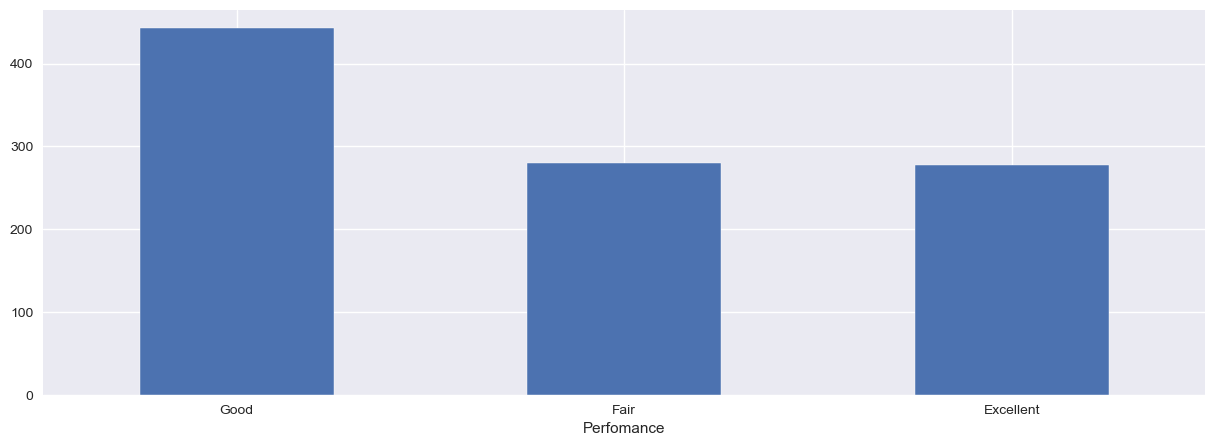

In [13]:
#Visualize new target feature
df['Perfomance'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

### DATA PREPARATION

In [14]:
#Split data into train and test 
X = df.drop(columns=['exam_score', 'Perfomance'], axis=1)
y = df['Perfomance']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
#Create new numerical and categorical columns for data pipeline
num_cols = ['age','study_hours_per_day','social_media_hours','netflix_hours','attendance_percentage','sleep_hours','exercise_frequency','mental_health_rating']
cat_cols = ['gender','part_time_job','diet_quality','internet_quality','extracurricular_participation']

#ordinal feature
parental_education_level = ['None', 'High School', 'Bachelor', 'Master']

In [16]:
#Build preprocessor pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')), #to handle missing values in numerical columns
    ('scaler', StandardScaler()) #scale the numerical columns
])

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')), #to handle missing values in catgorical columns
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) #encoding categorical columns
])

ordinal_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')), #to handlle missing values in the ordinal column
    ('ordinal', OrdinalEncoder(categories=[parental_education_level])) #ordinal encoding
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols), #for numerical columns
    ('cat', categorical_transformer, cat_cols), #for categorical columns
    ('ord', ordinal_transformer, ['parental_education_level']) #for ordinal column
])

In [17]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'study_hours_per_day',
                                  'social_media_hours', 'netflix_hours',
                                  'attendance_percentage', 'sleep_hours',
                                  'exercise_frequency',
                                  'mental_health_rating']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'part_time_job', 'diet_quality',
                                  'internet_quality',
                                  'extracurricular_participation']),
                                ('ord',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['None',
                                                                              'High '
                                                                              'School',
                                                                              'Bachelor',
                                                                              'Master']]))]),
                                 ['parental_education_level'])])

### MODEL TRAINING

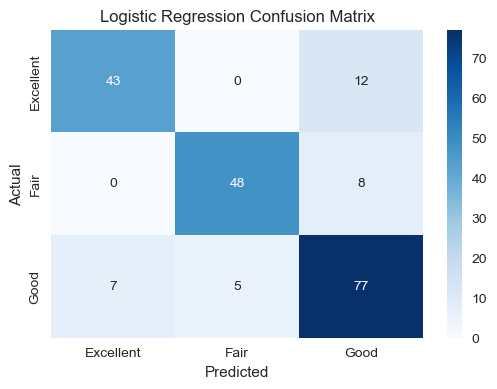

              precision    recall  f1-score   support

   Excellent       0.86      0.78      0.82        55
        Fair       0.91      0.86      0.88        56
        Good       0.79      0.87      0.83        89

    accuracy                           0.84       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.84      0.84      0.84       200



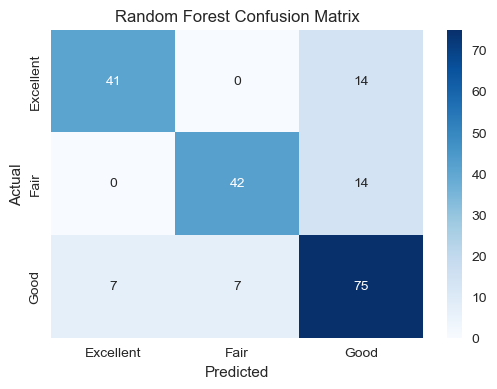

              precision    recall  f1-score   support

   Excellent       0.85      0.75      0.80        55
        Fair       0.86      0.75      0.80        56
        Good       0.73      0.84      0.78        89

    accuracy                           0.79       200
   macro avg       0.81      0.78      0.79       200
weighted avg       0.80      0.79      0.79       200



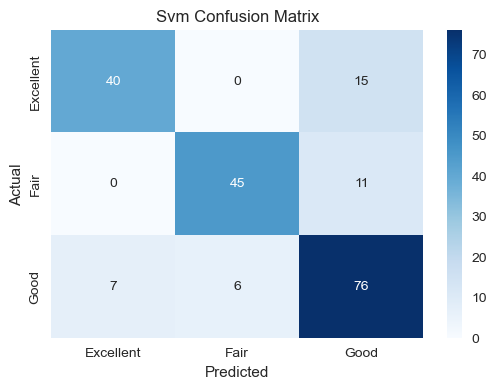

              precision    recall  f1-score   support

   Excellent       0.85      0.73      0.78        55
        Fair       0.88      0.80      0.84        56
        Good       0.75      0.85      0.80        89

    accuracy                           0.81       200
   macro avg       0.83      0.79      0.81       200
weighted avg       0.81      0.81      0.81       200



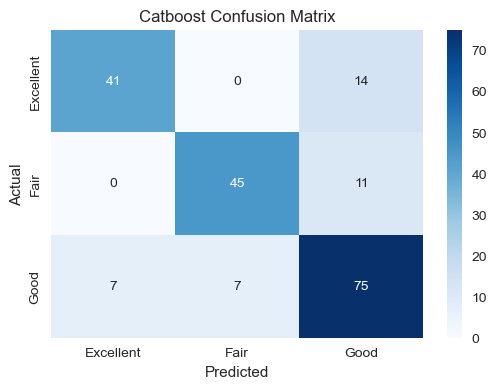

              precision    recall  f1-score   support

   Excellent       0.85      0.75      0.80        55
        Fair       0.87      0.80      0.83        56
        Good       0.75      0.84      0.79        89

    accuracy                           0.81       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.81      0.81      0.81       200



In [18]:
#Build a pipeline for model training

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#models
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial'),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Svm': SVC(),
    'Catboost': CatBoostClassifier(iterations=300, depth=3, learning_rate=0.1, loss_function='MultiClass',verbose=0)
}


#store results
results = {
    'Models': [],
    'Test Accuracy': [],
    'Train Accuracy': []
}

#Get each model for data training
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)

    #predictions for train and test
    test_pred = pipeline.predict(X_test)
    train_pred = pipeline.predict(X_train)

    #Accuracy score for train and test
    test_acc = accuracy_score(y_test, test_pred)
    train_acc = accuracy_score(y_train, train_pred)

    #Confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=pipeline.classes_ , yticklabels=pipeline.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Classification Report
    cr = classification_report(y_test, test_pred)
    print(cr)

    #append results
    results['Models'].append(name)
    results['Test Accuracy'].append(test_acc)
    results['Train Accuracy'].append(train_acc)
  



In [19]:
results_df = pd.DataFrame(results)

In [20]:
results_df

,Models,Test Accuracy,Train Accuracy
0,Logistic Regression,0.840,0.87000
1,Random Forest,0.790,1.00000
2,Svm,0.805,0.91125
3,Catboost,0.805,0.92750


In [21]:
#Select best model
best_model = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Models']

In [22]:
best_model = models[best_model]

In [23]:
best_model

LogisticRegression(multi_class='multinomial')

In [24]:
modell = pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', best_model)
    ])

In [25]:
modell

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   Simple...
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'internet_quality',
                                                   'extracurricular_participation']),
                                                 ('ord',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['None',
                                                                                               'High '
                                                                                               'School',
                                                                                               'Bachelor',
                                                                                               'Master']]))]),
                                                  ['parental_education_level'])])),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

In [26]:
modell.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   Simple...
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'internet_quality',
                                                   'extracurricular_participation']),
                                                 ('ord',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['None',
                                                                                               'High '
                                                                                               'School',
                                                                                               'Bachelor',
                                                                                               'Master']]))]),
                                                  ['parental_education_level'])])),
                ('classifier', LogisticRegression(multi_class='multinomial'))])